In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
import numpy as np
from astropy.time import Time
from astropy.io import fits
import astropy.units as u

### WASP-77 DATA

In [2]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA'

#### flat .fits file

In [ ]:
p=path/Path('SDCH_20201213_0001.flat_off.fits')
h1,d1=fits_view(p,0)

p=path/Path('SDCH_20201213_0011.flat_normed.fits')
_,d2=fits_view(p,0)

p=path/Path('SDCH_20201213_0011.flat_on.fits')
_,d3=fits_view(p,0)
_,d4=fits_view(p,1)

In [ ]:
fig,axes=plt.subplots(2,2)

# Plot the data on each subplot with the respective colormap
img1 = axes[0, 0].imshow(d1, cmap='gray')
img2 = axes[0, 1].imshow(d2, cmap='gray')
img3 = axes[1, 0].imshow(d3, cmap='gray')
img4 = axes[1, 1].imshow(d4, cmap='gray')

# Add colorbars to each subplot
cbar1 = fig.colorbar(img1, ax=axes[0, 0])
cbar2 = fig.colorbar(img2, ax=axes[0, 1])
cbar3 = fig.colorbar(img3, ax=axes[1, 0])
cbar4 = fig.colorbar(img4, ax=axes[1, 1])

# Add titles to the subplots (optional)
axes[0, 0].set_title('flat_off')
axes[0, 1].set_title('flat_normed')
axes[1, 0].set_title('flat_on primary')
axes[1, 1].set_title('flat_on extension')

# Adjust the spacing between subplots (optional)
plt.tight_layout()

# Display the figure
plt.show()

### View spectrum

#### H band data

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCH_20201213_0181.wave.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 28)   float64   


(28, 2048)


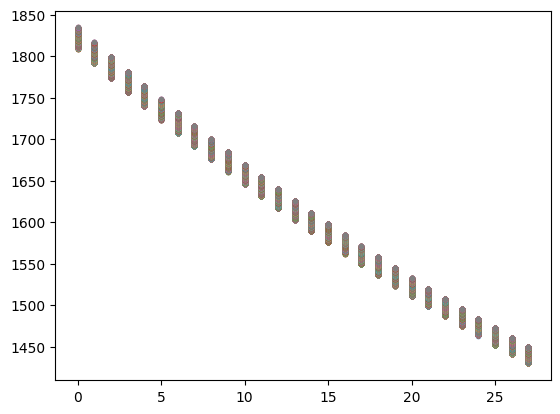

In [3]:
# extract the H band wavelength data
p=path/Path('SDCH_20201213_0181.wave.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    wave_h = hdu[0].data
    print(wave_h.shape)

plt.plot(wave_h, '.') ;

In [4]:
# extract the spectrum 2d data
p=path/Path('SDCH_20201213_0101.spec2d.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec_h = hdu[0].data
    print(spec_h.shape)

spec_frame=spec_h[:,30,:]
print(spec_frame.shape)
h

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCH_20201213_0101.spec2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     303   (2048, 65, 28)   float32   
  1                1 ImageHDU       200   (2048, 28)   float64   
(28, 65, 2048)
(28, 2048)


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                   65                                                  
NAXIS3  =                   28                                                  
EXTEND  =                    T                                                  
I_HDRVER= '0.992   '           / version of IGRINS FITS Header                  
OBSERVAT= 'Gemini Observatory' / Name of the observatory                        
TELESCOP= 'Gemini South'       / Name of the telescope                          
INSTRUME= 'IGRINS  '           / Name of the instrument                         
DETECTOR= 'H2RG    '           / name of Detector                               
TIMESYS = 'UTC     '        

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan   -3.3590527 ...   -1.7149843 -118.88401
    -3.2569726]
 [         nan          nan   -2.188931  ...          nan          nan
           nan]
 ...
 [         nan          nan   -1.3304765 ...          nan          nan
           nan]
 [         nan          nan   -3.02115   ...          nan          nan
           nan]
 [         nan          nan          nan ...   -1.7865509   -2.86781
    -2.1799612]]


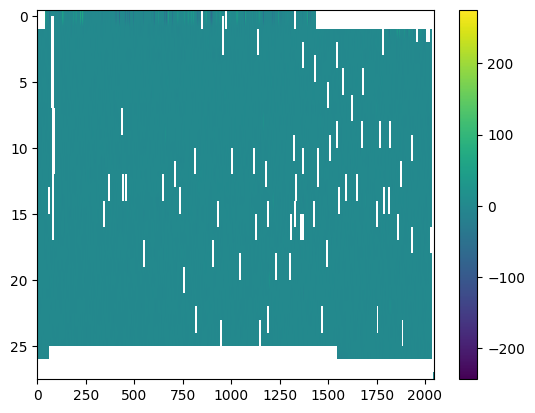

In [5]:
print(spec_frame)
f1 = plt.figure()
plt.imshow(spec_frame,aspect='auto')
plt.colorbar()

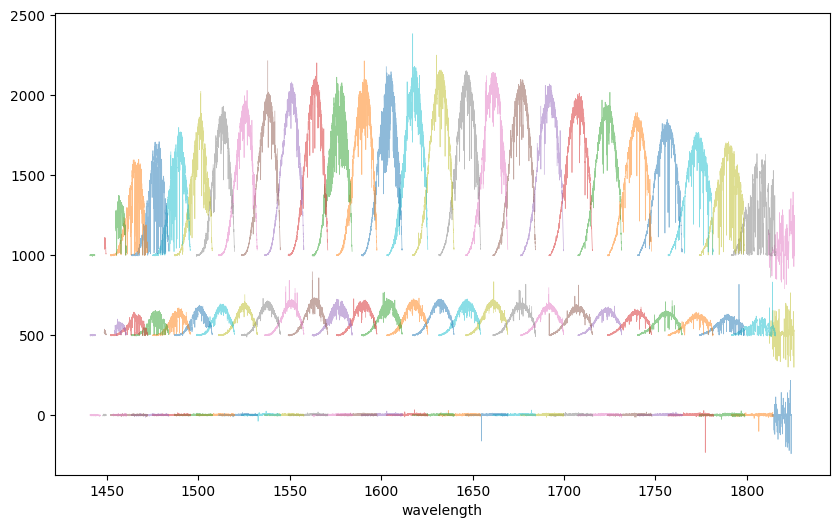

In [6]:
f1=plt.subplots(figsize=(10,6));
plt.plot(wave_h.T,spec_h[:,1,:].T,alpha=0.5,linewidth=0.5);
plt.plot(wave_h.T,spec_h[:,11,:].T+500,alpha=0.5,linewidth=0.5);
plt.plot(wave_h.T,spec_h[:,14,:].T+1000,alpha=0.5,linewidth=0.5);
plt.xlabel('wavelength');

#### K band data

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCK_20201213_0181.wave.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 26)   float64   
(26, 2048)


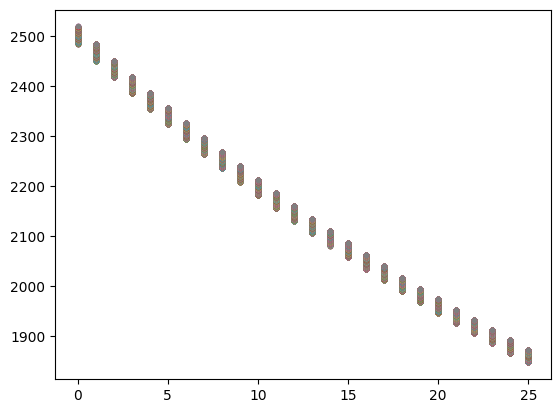

In [7]:
# extract the K band wavelength data
p=path/Path('SDCK_20201213_0181.wave.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    wave_k = hdu[0].data
    print(wave_k.shape)

plt.plot(wave_k, '.') ;

In [8]:
# extract the spectrum 2d data
p=path/Path('SDCK_20201213_0021.spec2d.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec_k = hdu[0].data
    print(spec_k.shape)

spec_frame=spec_k[:,0,:]
print(spec_frame.shape)

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCK_20201213_0021.spec2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     297   (2048, 62, 26)   float32   
  1                1 ImageHDU       194   (2048, 26)   float64   
(26, 62, 2048)
(26, 2048)


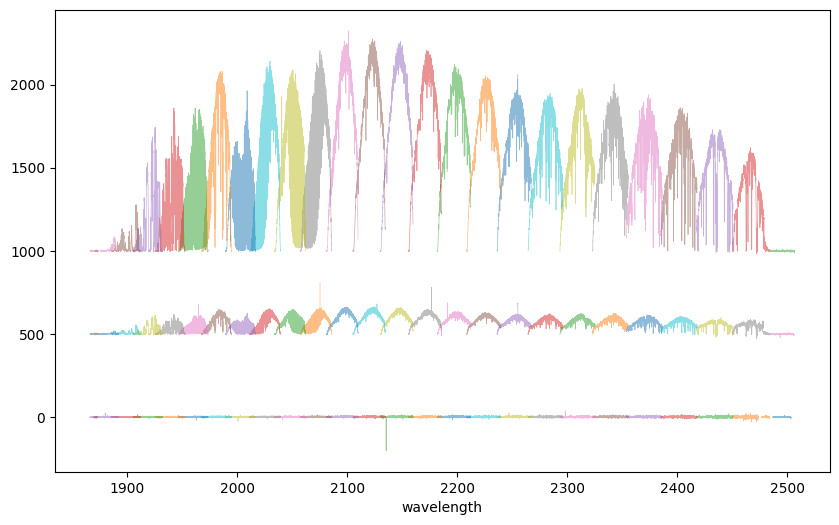

In [9]:
f2=plt.subplots(figsize=(10,6));
plt.plot(wave_k.T,spec_k[:,1,:].T,alpha=0.5,linewidth=0.5);
plt.plot(wave_k.T,spec_k[:,11,:].T+500,alpha=0.5,linewidth=0.5);
plt.plot(wave_k.T,spec_k[:,14,:].T+1000,alpha=0.5,linewidth=0.5);
plt.xlabel('wavelength');

#### Combined H and K band

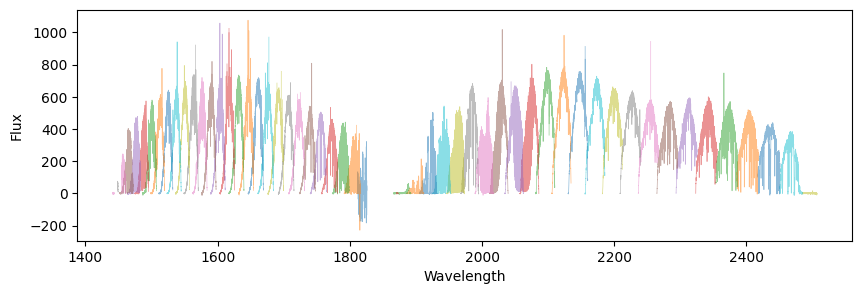

In [18]:
# second time frame
frame = 13
f3=plt.subplots(figsize=(10,3));
plt.plot(wave_h.T,spec_h[:,frame,:].T,alpha=0.5,linewidth=0.5);
plt.plot(wave_k.T,spec_k[:,frame,:].T,alpha=0.5,linewidth=0.5);

plt.xlabel('Wavelength');
plt.ylabel('Flux');

## 1D spectrum, Preprocessing

### Define FUNCTIONS to find BLAZE FUNCTION

In [ ]:
from astropy.convolution import interpolate_replace_nans, Box1DKernel
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from astropy.convolution import convolve
from scipy.signal import find_peaks

def find_max_continuous_nan(values):
    max_streak = 0
    current_streak = 0

    for value in values:
        if np.isnan(value):
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 0

    max_streak = max(max_streak, current_streak)

    return max_streak

def find_func(obs, wavelength, order, crop=(None,None), telluric=None, method='find_peaks',low_pass_order=2,conv_box=200,fit_order=8,peak_prominence=0.0001):
    """
    Three methods:
    1. low_pass: Low-pass filter
    2. convolution: Convolution
    3. find_peaks: Find non-signal point and fit a polynomial

    Parameters:
    - obs: ndarray, observation of all order
    - wavelength: ndarray, wavelength of all order
    - order: int, specify which order of the spectrum
    - telluric: 2d array, the result of 1st function call and divide by the blaze function of the corresponding order
    - crop: tuple, specifythe wavelength range you would like to include
    - method: str, specify the method to use (default: 'find_peaks')

    Returns:
    Method 3
    - wave_order: ndarray, the wavelength array of the given order
    - pos: ndarray, index of wavelength where the blaze function should be plotted
    - bl_fit: ndarray, clipped blaze function (y_axis value corresponding to the pos), clipped to ensure no negative value
    """ 

    print('Finding........')
    
    blaze_order = obs[order]  # one order of uncorrected blaze function
    wave_order = wavelength[order]
    wave_order_ori = wavelength[order]

    nan_array = np.full(blaze_order.shape, np.nan)

    my_slice = slice(*crop)
    blaze_order = blaze_order[my_slice]  # one order of uncorrected blaze function
    wave_order = wave_order_ori[my_slice]
    
    # clear the nan in the original blaze function with telluric
    blaze_order_nonan = interpolate_replace_nans(blaze_order, Box1DKernel(find_max_continuous_nan(blaze_order)+1))
    nan_num = np.sum(np.isnan(blaze_order_nonan))

    if nan_num > 0:
        raise ValueError(f"The data contains {nan_num} NaN values. Clean the data before applying the method.")

    if telluric is None:
        telluric = blaze_order_nonan
    else: # telluric function passed
        telluric = telluric[order]
        telluric = telluric[my_slice]
    
    if method == 'low_pass':
        print('LOW-PASS METHOD applied')
        # LOW-PASS FILTER METHOD

        # Assumption variables made for low-pass filter
        freq_samp = 1000  # 1000 samples per second
        dt = 1 / freq_samp  # 0.001 second per sample
        t = np.arange(len(blaze_order)) * dt  # Time array
        period = len(blaze_order) * 2.2 / freq_samp

        order = low_pass_order  # Filter order
        cutoff_freq = 8  # Cutoff frequency (adjust as needed)

        b, a = signal.butter(order, cutoff_freq, btype='lowpass', fs=freq_samp)
        filtered = signal.filtfilt(b, a, blaze_order_nonan)  # Apply the low-pass filter
        filtered = np.clip(filtered, 0, None)

        nan_array[my_slice]=filtered
        
        return wave_order_ori, nan_array

    elif method == 'convolution':
        print('CONVOLUTION METHOD applied')
        # CONVOLUTION METHOD
        conv = convolve(blaze_order_nonan, Box1DKernel(conv_box))
        conv = np.clip(conv, 0, None)

        nan_array[my_slice]=conv

        return wave_order_ori, nan_array

    elif method == 'find_peaks':
        print('FIND PEAK METHOD applied')
        # FIND_PEAKS AND FIT METHOD
        # pos, _ = find_peaks(blaze_order_nonan, prominence=(None, peak_prominence))
        # coeffs = np.polyfit(pos, blaze_order_nonan[pos], fit_order)
        # bl_fit = np.polyval(coeffs, pos)
        
        pos, _ = find_peaks(telluric, prominence=(None, peak_prominence))
        print('For order = ',order, 'The position is',pos)
        print('For order = ',order, 'The wavelength range is',wave_order)
        coeffs = np.polyfit(wave_order[pos], blaze_order_nonan[pos],fit_order)
        bl_fit = np.polyval(coeffs, wave_order)
        bl_fit = np.clip(bl_fit, 0, None) # perform clip

        nan_array[my_slice]=bl_fit

        return wave_order_ori, nan_array

    else:
        raise ValueError("Invalid method. Choose one of 'low_pass', 'convolution', or 'find_peaks'.")


In [3]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA'
p=path/Path('SDCH_20201213_0021.spec_a0v.fits')

# H band
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    wave = hdu[1].data
    tgt = hdu[2].data
    a0v = hdu[3].data
    vega = hdu[4].data

blaze = a0v/vega # H_blaze (blaze with telluric)
H_blaze = blaze

# K band
p=path/Path('SDCK_20201213_0021.spec_a0v.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    K_wave = hdu[1].data
    tgt = hdu[2].data
    K_a0v = hdu[3].data
    K_vega = hdu[4].data

K_blaze = K_a0v/K_vega # blaze_obs

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCH_20201213_0021.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     305   (2048, 28)   float64   
  1  WAVELENGTH    1 ImageHDU       304   (2048, 28)   float64   
  2  TGT_SPEC      1 ImageHDU       304   (2048, 28)   float32   
  3  A0V_SPEC      1 ImageHDU       304   (2048, 28)   float32   
  4  VEGA_SPEC     1 ImageHDU       304   (2048, 28)   float64   
  5  SPEC_DIVIDE_CONT    1 ImageHDU       304   (2048, 28)   float64   


Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCK_20201213_0021.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     299   (2048, 26)   float64   
  1  WAVELENGTH    1 ImageHDU       298   (2048, 26)   float64   
  2  TGT_SPEC      1 ImageHDU       298   (2048, 26)   float32   
  3  A0V_SPEC      1 ImageHDU       298   (2048, 26)   float32   
  4  VEGA_SPEC     1 ImageHDU       298   (2048, 26)   float64   
  5  SPEC_DIVIDE_CONT    1 ImageHDU       298   (2048, 26)   float64   


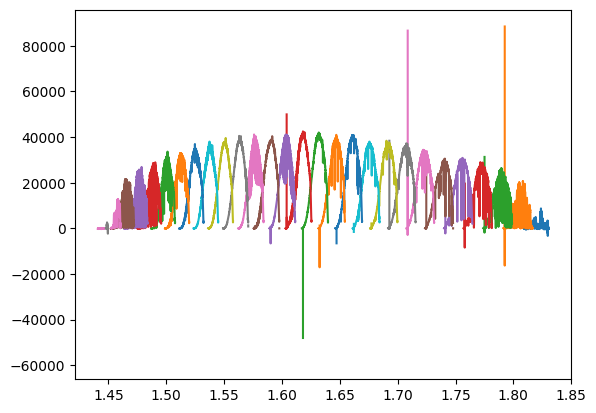

In [7]:
plt.plot(wave.T, a0v.T)

#### Use a0v to find S/N, and telluric

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 28)   float64   
Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_blaze_function.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 26)   float64   


/tmp/ipykernel_3003782/1088616581.py:2: RuntimeWarning: invalid value encountered in sqrt
  sn = np.nanmedian(np.sqrt(a0v),axis=1) # a0v shape = 28 or 26 rows, 2048 columns


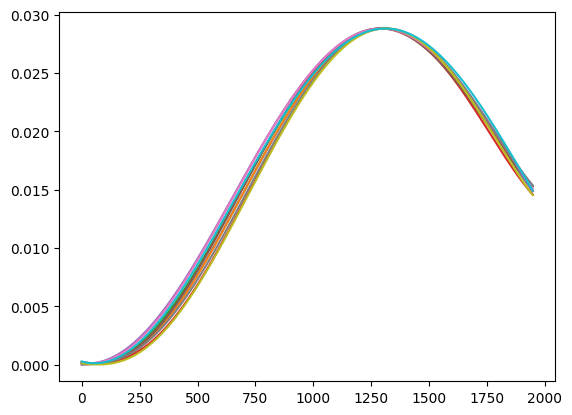

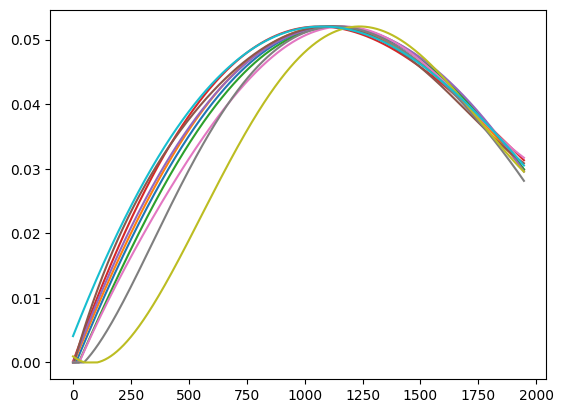

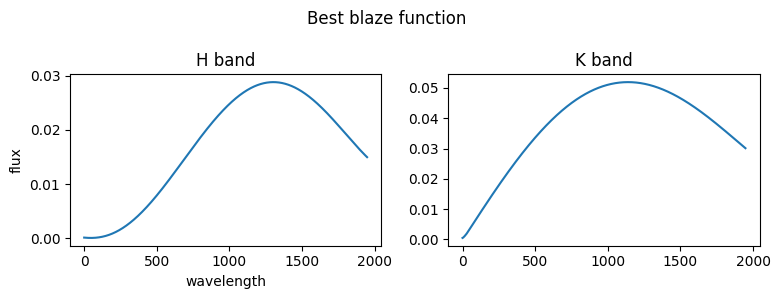

In [3]:
def find_best_blaze(num_order, path, a0v):
    sn = np.nanmedian(np.sqrt(a0v),axis=1) # a0v shape = 28 or 26 rows, 2048 columns
    idx = np.argsort(sn)[::-1] # indices of sn array with descending signal to noise (median)
    good_idx = idx[:num_order]
    
    with fits.open(path) as hdu:
        hdu.info()
        b=hdu[0].data

    good_blaze = b[good_idx] # shape = (5,2048)
    blaze_max = np.nanmax(good_blaze)
    good_blaze = good_blaze/np.nanmax(good_blaze,axis=1)[:,None]
    good_blaze *= blaze_max
    ens_avg = np.mean(good_blaze, axis=0) # shape = (2048,)

    plt.figure()
    plt.plot(good_blaze.T)

    return ens_avg

p=Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits')
H_best_blaze = find_best_blaze(10,p, a0v)

p=Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_blaze_function.fits')
K_best_blaze = find_best_blaze(10,p, K_a0v)

f1,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(H_best_blaze)
ax[0].set(title='H band', xlabel='wavelength', ylabel='flux')
ax[1].plot(K_best_blaze)
ax[1].set(title='K band')
plt.suptitle('Best blaze function')
plt.tight_layout()

In [4]:
# H_telluric = H_blaze/H_best_blaze # shape = 28, 2048
# K_telluric = K_blaze/H_best_blaze # shape = 26, 2048

H_bad = [0,1,26,27]
K_bad = [0,1,18,20,21,22,23,24,25]
H_order = list(range(28))
K_order = list(range(26))
H_telluric = np.empty((0,2048))
K_telluric = np.empty((0,2048))

p = '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits'
with fits.open(p) as hdu:
    b=hdu[0].data

    for order in H_order:
        if order in H_bad:
            t=H_blaze[order]/H_best_blaze
            H_telluric = np.vstack((H_telluric, t))
        else:
            t = H_blaze[order]/b[order]
            H_telluric = np.vstack((H_telluric, t))


p = '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_blaze_function.fits'
with fits.open(p) as hdu:
    b=hdu[0].data

    for order in K_order:
        if order in K_bad:
            t=K_blaze[order]/K_best_blaze
            K_telluric = np.vstack((K_telluric, t))
        else:
            t = K_blaze[order]/b[order]
            K_telluric = np.vstack((K_telluric, t))

/tmp/ipykernel_3003782/1688090158.py:20: RuntimeWarning: divide by zero encountered in divide
  t = H_blaze[order]/b[order]
/tmp/ipykernel_3003782/1688090158.py:33: RuntimeWarning: divide by zero encountered in divide
  t = K_blaze[order]/b[order]


#### Save telluric estimates

In [5]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(H_telluric)

h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_tellu_recon.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(K_telluric)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_tellu_recon.fits'), overwrite=True)

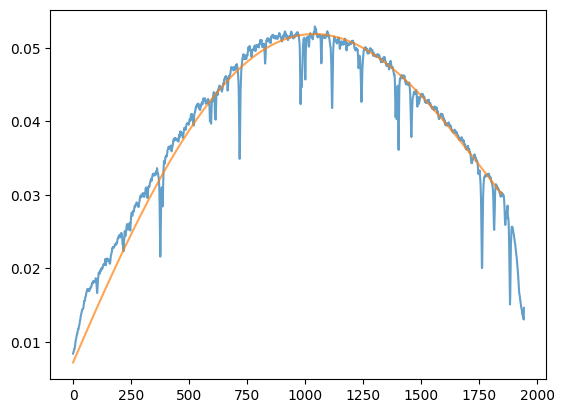

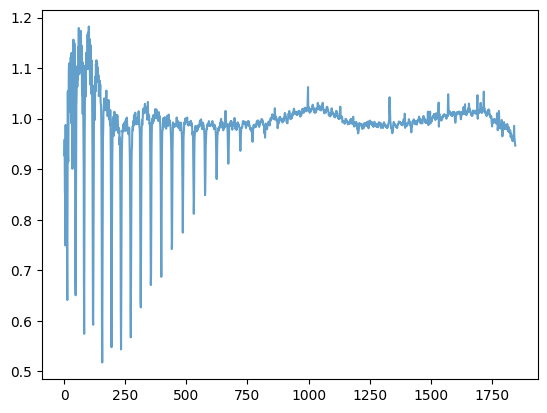

In [6]:
plt.figure()
# plt.plot(H_blaze[11],alpha=0.7)
plt.plot(K_blaze[11][100:],alpha=0.7)
plt.plot(K_best_blaze[100:],alpha=0.7)

plt.figure()
plt.plot(H_telluric[15][100:],alpha=0.7)

### Preprocessing continue

##### Find_peaks and fit polynomial method

(array([   0,   83, 2044, 2045, 2046, 2047]),)
288


/home/ldang05/venv/ss-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


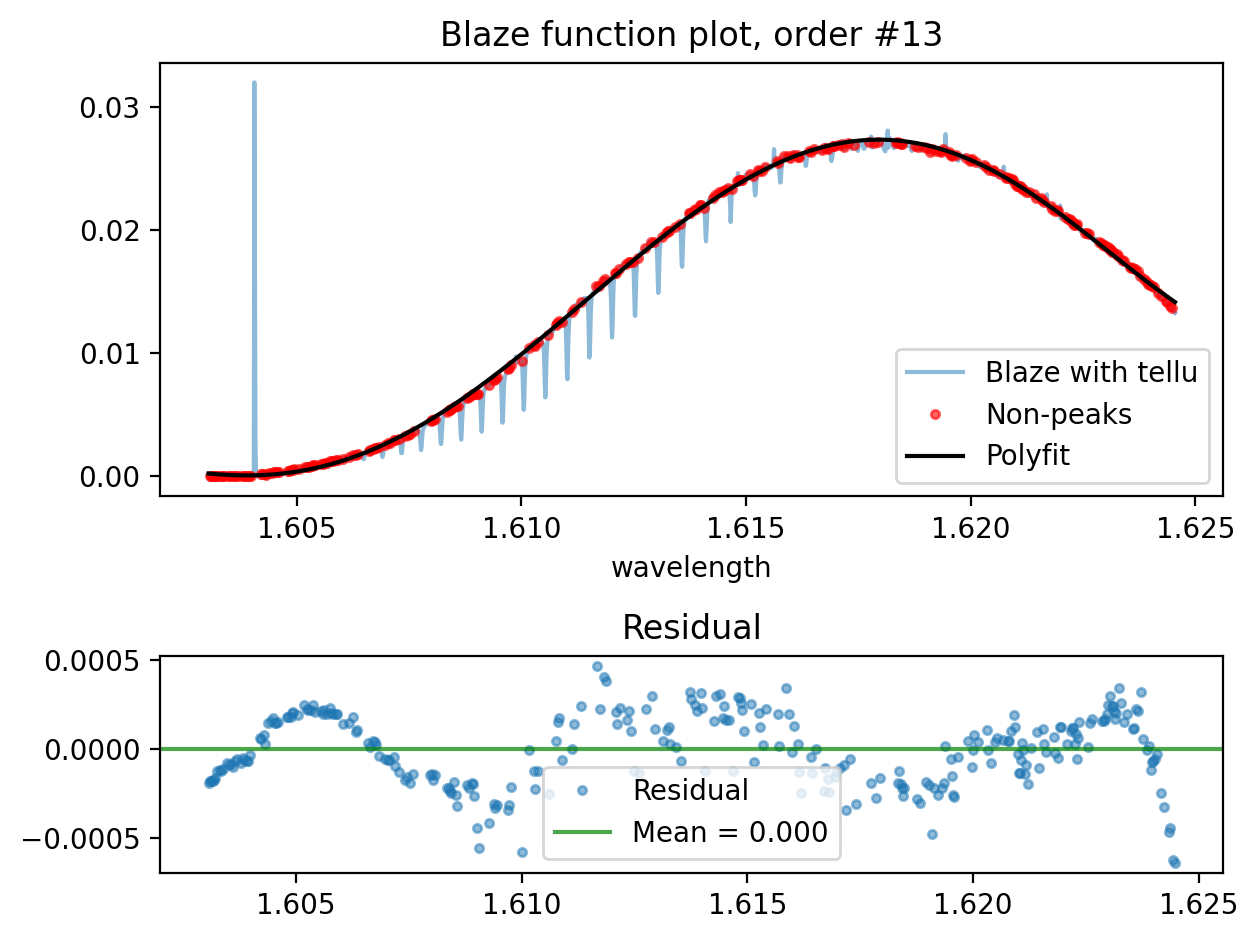

In [42]:
order=13
blaze_order = blaze[order] # one order of uncorrected blaze function
wave_order = wave[order]
print(np.nonzero(np.isnan(blaze_order)))

blaze_order = blaze_order[:-100] # one order of uncorrected blaze function
wave_order = wave_order[:-100]

from astropy.convolution import interpolate_replace_nans, Box1DKernel
blaze_order_nonan = interpolate_replace_nans(blaze_order, Box1DKernel(find_max_continuous_nan(blaze_order)+1))

from scipy.signal import find_peaks
peaks, _ = find_peaks(blaze_order_nonan, prominence=(None, 0.0001)) # peaks returns the position of the peak
coeffs = np.polyfit(wave_order[peaks], blaze_order_nonan[peaks],8)
print(len(peaks))

# Evaluate the polynomial at the generated points
y_fit = np.polyval(coeffs, wave_order)
res = blaze_order_nonan[peaks] - y_fit[peaks]

f1,ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},dpi=200)
ax[0].plot(wave_order, blaze_order_nonan,label='Blaze with tellu',alpha=0.5)
ax[0].plot(wave_order[peaks], blaze_order_nonan[peaks], ".", color='r',label='Non-peaks',alpha=0.6)
ax[0].plot(wave_order,y_fit,color='k',label='Polyfit')
ax[0].set(title='Blaze function plot, order #{}'.format(order),xlabel='wavelength')
ax[0].legend()

ax[1].plot(wave_order[peaks],res, '.', label='Residual',alpha=0.5)
ax[1].axhline(np.mean(res), color='g',label='Mean = {:.3f}'.format(np.mean(res)), alpha=0.7)
ax[1].set_title('Residual')
ax[1].legend()

plt.tight_layout()
plt.show()


#### Telluric improvement

In [8]:
# # slice test
# my_arr = np.arange(10)
# crop = (2, -3)
# my_slice = slice(*crop)
# sliced_arr = my_arr[my_slice]
# nan_arr = np.full(my_arr.shape, np.nan)
# nan_arr[my_slice] = sliced_arr

# print(my_arr, my_slice, sliced_arr, nan_arr)

In [33]:
# H band
# blaze_func_arr = np.empty((0, np.shape(spec)[1]));
# orders = range(np.shape(spec)[0])
blaze_func_arr1 = np.empty((0,2048))
blaze_func_arr2 = np.empty((0,2048))
H_orders = range(28)
K_orders = range(26)
crop = (100, -100)

for order in H_orders:
    # _, b1 = find_func(H_blaze, wave, order, crop, telluric=None, peak_prominence=0.05);
    # _, b2 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
    # _, b1 = find_func(K_blaze, K_wave, order, crop, telluric=None, peak_prominence=0.05);
    # _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
    _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
    blaze_func_arr1 = np.vstack((blaze_func_arr1, b1));

for order in K_orders:
    _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
    blaze_func_arr2 = np.vstack((blaze_func_arr2, b2));

h_tc = blaze_func_arr1
k_tc = blaze_func_arr2

np.sum(np.isnan(h_tc[0]))

# f,ax=plt.subplots()
# plt.plot(blaze_func_arr1.T)
# plt.plot(blaze_func_arr2.T)

# print(blaze_func_arr1[0][200:600]-blaze_func_arr2[0][200:600])


Finding........
FIND PEAK METHOD applied
For order =  0 The position is [   5   10   36   49   73  109  134  139  141  144  150  160  170  172
  187  197  208  226  236  246  257  277  293  304  308  311  315  318
  322  332  334  340  356  358  363  368  370  374  376  379  381  385
  389  392  398  400  403  422  425  436  438  441  445  452  457  468
  471  475  503  509  514  516  519  526  528  530  533  539  545  558
  561  563  565  569  575  578  581  587  590  593  598  602  607  610
  623  625  630  634  637  642  644  651  658  667  671  708  713  721
  727  730  734  739  741  744  749  753  757  761  765  769  774  780
  787  790  793  796  800  807  821  829  832  838  843  845  850  852
  856  861  867  869  872  874  882  886  889  893  907  923  928  932
  942  944  947  951  954  957  961  965  968  971  978  986  989  993
  998 1007 1011 1016 1025 1029 1033 1036 1041 1053 1055 1058 1060 1067
 1069 1074 1080 1082 1087 1091 1093 1101 1109 1120 1122 1125 1131 1147
 1150

/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = find_func(H_blaze, wave, order, crop, telluric=H_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:15: RankWarning: Polyfit may be poorly conditioned
  _, b1 = fi

FIND PEAK METHOD applied
For order =  10 The position is [  11   15   19   38   43   46   54   89  100  104  106  116  118  122
  124  128  134  138  143  146  151  156  161  167  172  174  176  180
  182  186  197  200  208  223  225  232  235  239  244  247  259  261
  273  275  293  296  299  301  306  308  313  329  331  334  339  341
  343  350  353  355  359  364  378  382  388  390  396  402  407  409
  412  415  417  439  442  447  452  455  459  464  468  471  475  478
  488  490  492  497  500  502  505  509  512  514  516  522  524  527
  529  532  536  539  543  547  549  551  559  561  565  570  577  581
  589  591  599  602  604  607  609  619  621  627  632  634  638  643
  647  656  660  664  667  673  675  680  682  684  687  733  735  737
  739  741  745  751  754  756  761  763  765  767  769  776  778  780
  783  787  791  798  810  813  816  818  826  837  843  845  847  851
  853  857  868  870  877  879  883  892  897  899  905  909  912  918
  920  925  942  951

/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  _, b2 = find_func(K_blaze, K_wave, order, crop, telluric=K_telluric, peak_prominence=0.05);
/tmp/ipykernel_2070814/4103752276.py:19: RankWarning: Polyfit may be poorly conditioned
  

200

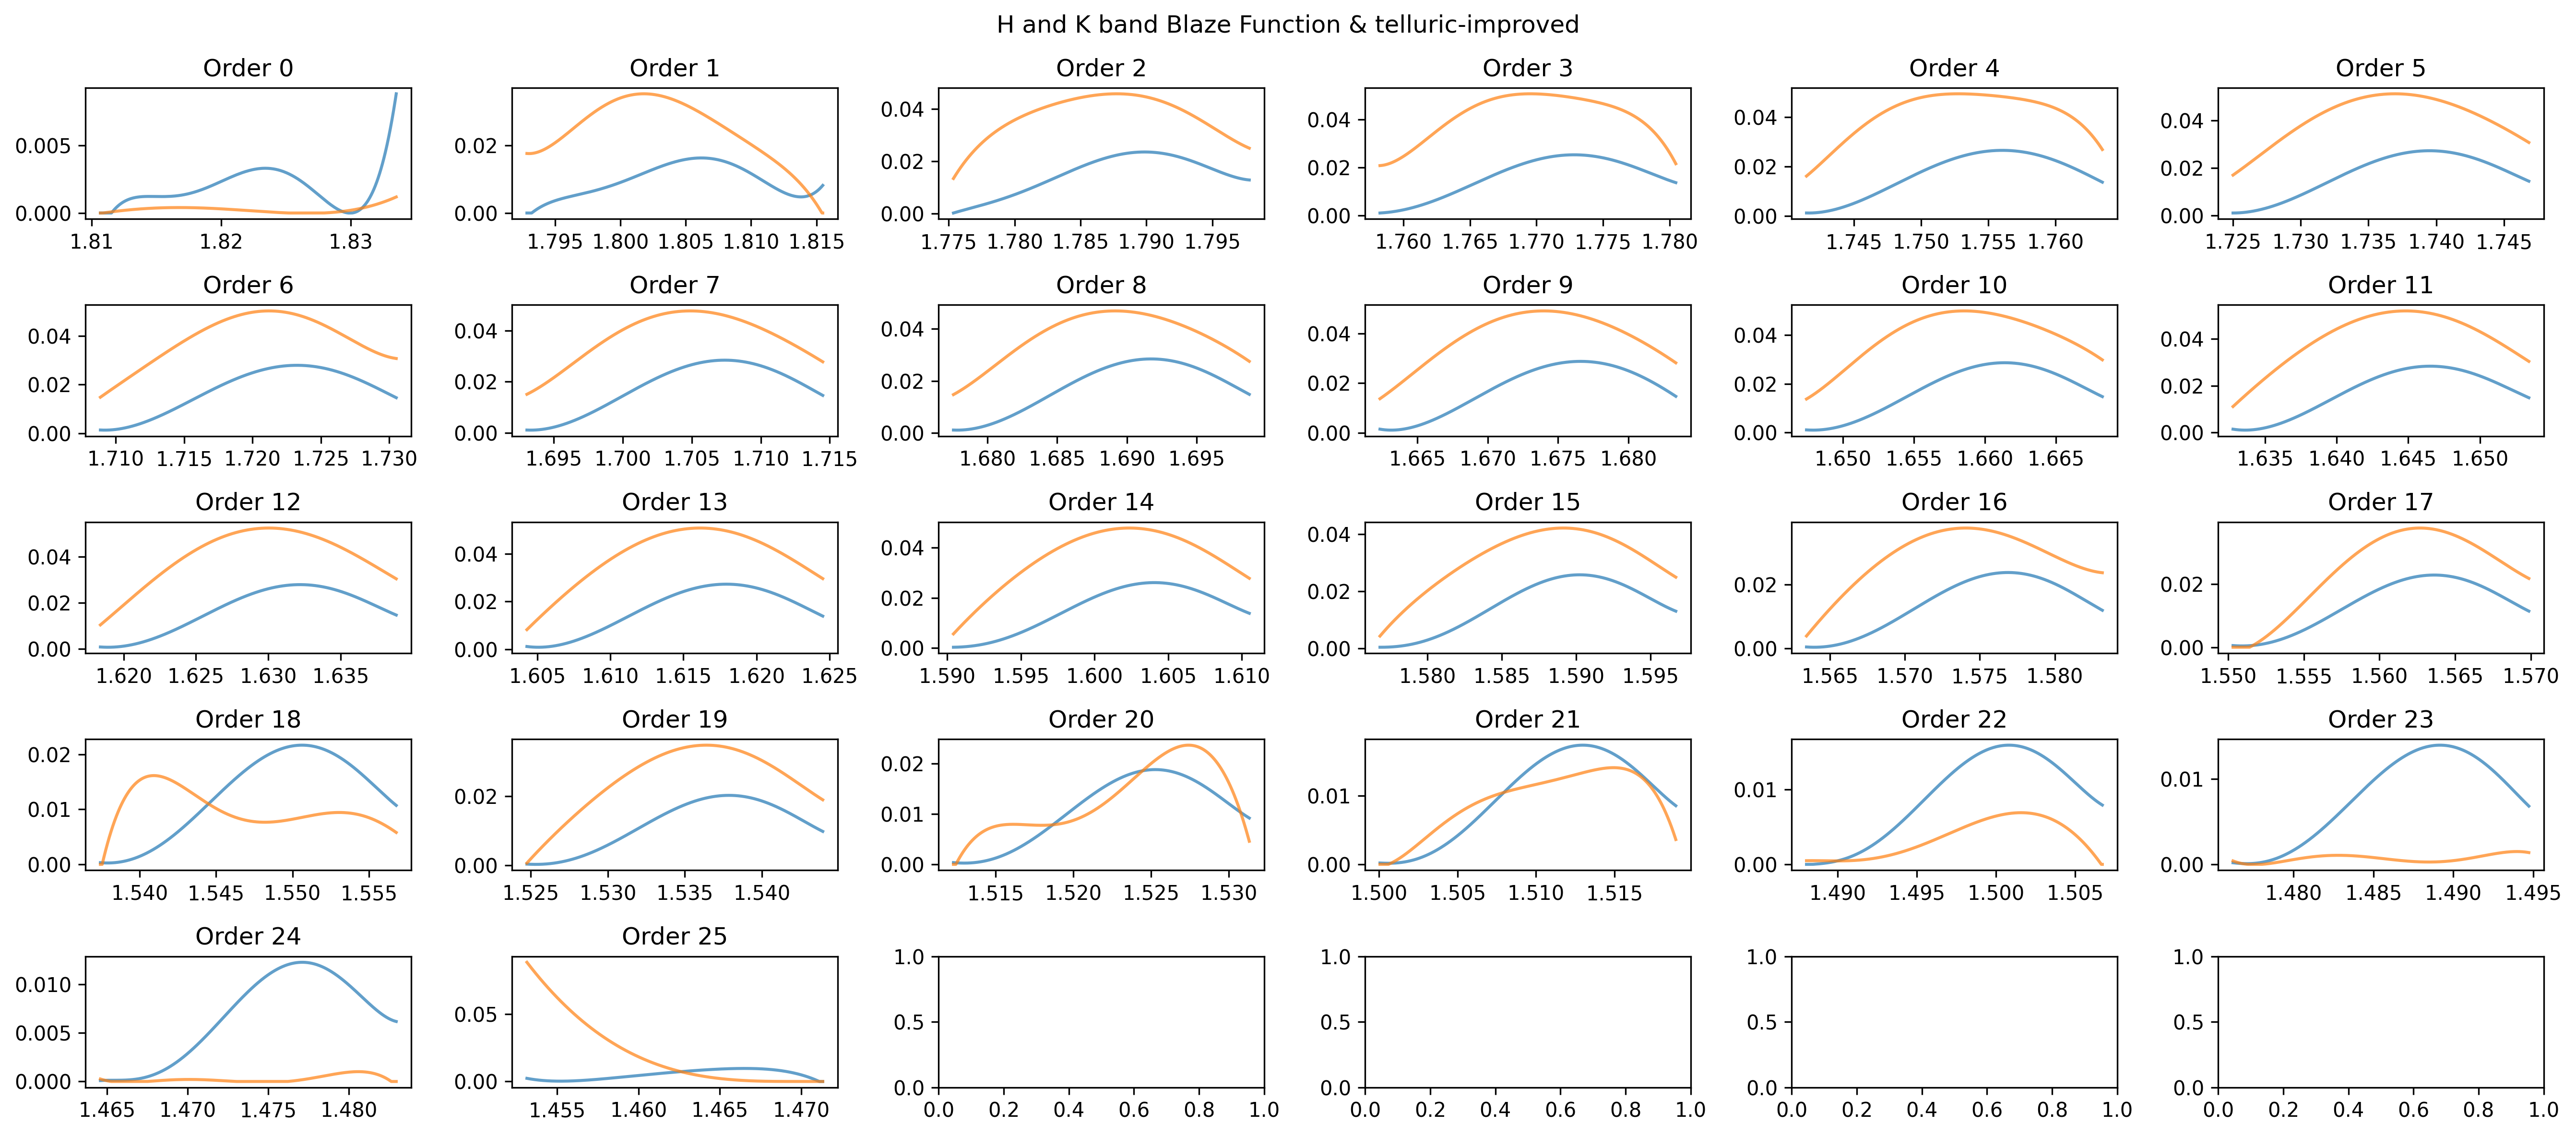

In [34]:
fig, ax = plt.subplots(5, 6, figsize=(18, 8), dpi=300)
fig.tight_layout(pad=2.0)

for i, order in enumerate(orders):
    ax_row = i // 6  # Calculate the row index of the current subplot
    ax_col = i % 6   # Calculate the column index of the current subplot
    
    ax[ax_row, ax_col].plot(wave[order], blaze_func_arr1[order], alpha=0.7)
    ax[ax_row, ax_col].plot(wave[order], blaze_func_arr2[order], alpha=0.7)
    ax[ax_row, ax_col].set_title('Order {}'.format(order))

# plt.suptitle('H band Blaze Function & telluric-improved')
plt.suptitle('H and K band Blaze Function & telluric-improved')
# plt.suptitle('K band Blaze Function & telluric-improved \n order 25 ignored, tiny flux')

plt.tight_layout()
plt.show()

#### Save telluric-improved blaze function

In [ ]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(h_tc)
h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_telluric_corr.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(k_tc)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_telluric_corr.fits'), overwrite=True)

#### Test

Finding........
LOW-PASS METHOD applied
[ 0.  0.  0. ... nan nan nan]
Finding........
CONVOLUTION METHOD applied
[0.00182777 0.00185864 0.00188941 ...        nan        nan        nan]
Finding........
FIND PEAK METHOD applied
[ 0.  0.  0. ... nan nan nan]


/tmp/ipykernel_157543/1630354635.py:8: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, crop,method=method,fit_order=8,conv_box=400,peak_prominence=0.05)


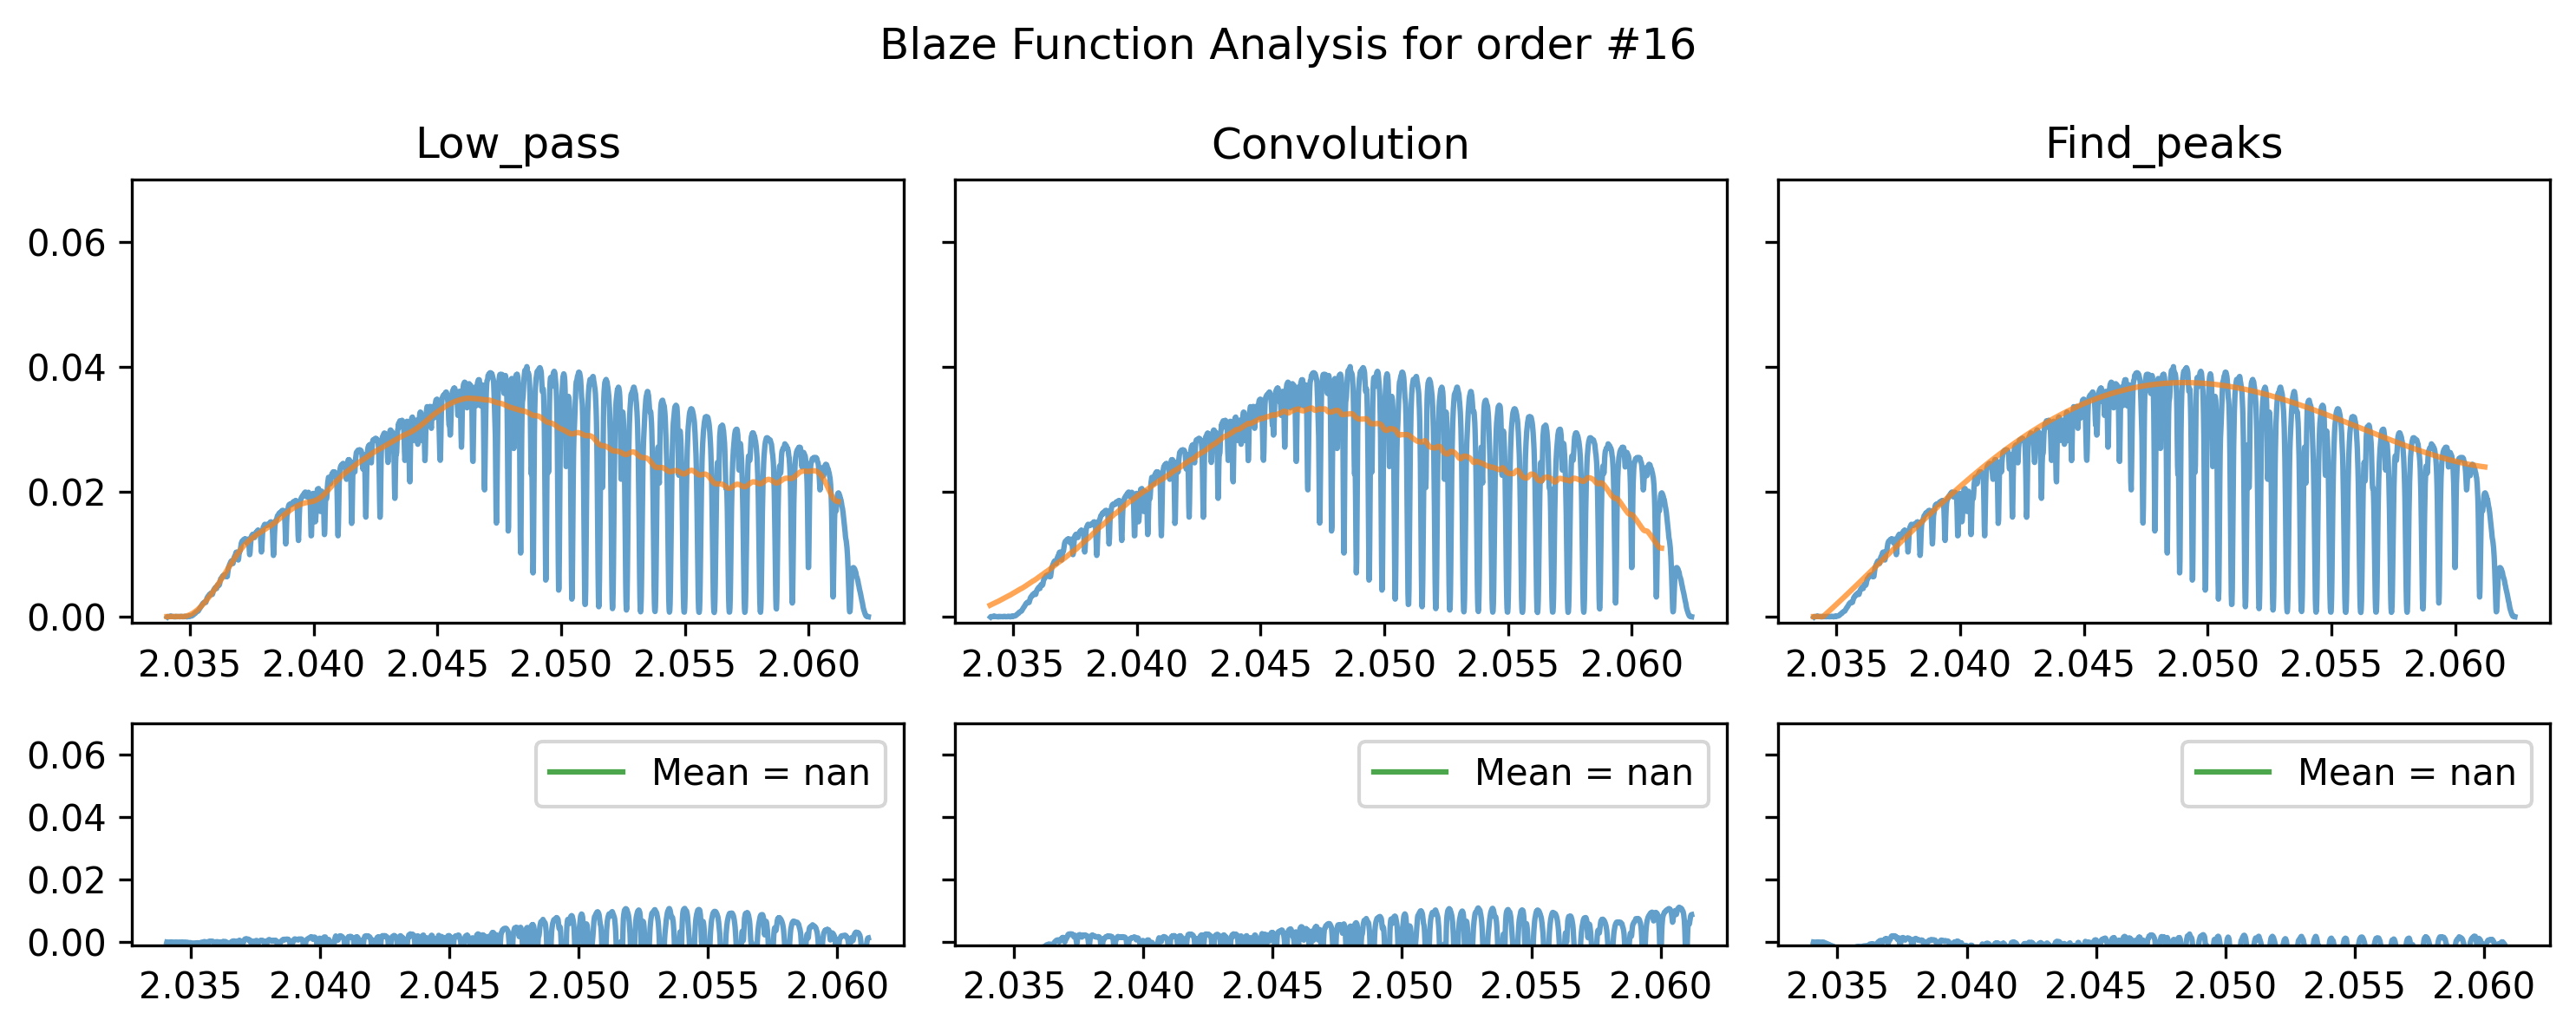

In [7]:
order = 16
crop = (200,-100)
methods = ['low_pass', 'convolution', 'find_peaks']

f, ax = plt.subplots(2, len(methods), figsize=(10, 4), sharey=True, gridspec_kw={'height_ratios': [2, 1]}, dpi=300)

for i, method in enumerate(methods):
    w, b = find_func(H_blaze, wave, order, crop, method=method,fit_order=8,conv_box=400,peak_prominence=0.05)
    print(b)
    blaze_order_nonan = interpolate_replace_nans(blaze[order], Box1DKernel(find_max_continuous_nan(blaze[order])+1))
    # res = blaze_order_nonan[:crop]-b
    res = blaze_order_nonan-b

    # ax[0][i].plot(w, blaze[order][:crop], alpha=0.7)
    ax[0][i].plot(w, blaze[order], alpha=0.7)
    ax[0][i].plot(w, b, alpha=0.7)
    ax[0][i].set_ylim([-0.001,0.07])

    ax[1][i].plot(w, res, alpha=0.7)
    ax[1][i].axhline(np.mean(res), color='g',label='Mean = {:.3f}'.format(np.mean(res)), alpha=0.7)
    ax[1][i].legend()

    ax[0][i].set(title=method.capitalize())

plt.suptitle('Blaze Function Analysis for order #{}'.format(order))
plt.tight_layout()


Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........


/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841/643965089.py:15: RankWarning: Polyfit may be poorly conditioned
  w, b = find_blaze_func(blaze, wave, order, method=m,peak_prominence=0.08)
/tmp/ipykernel_2606841

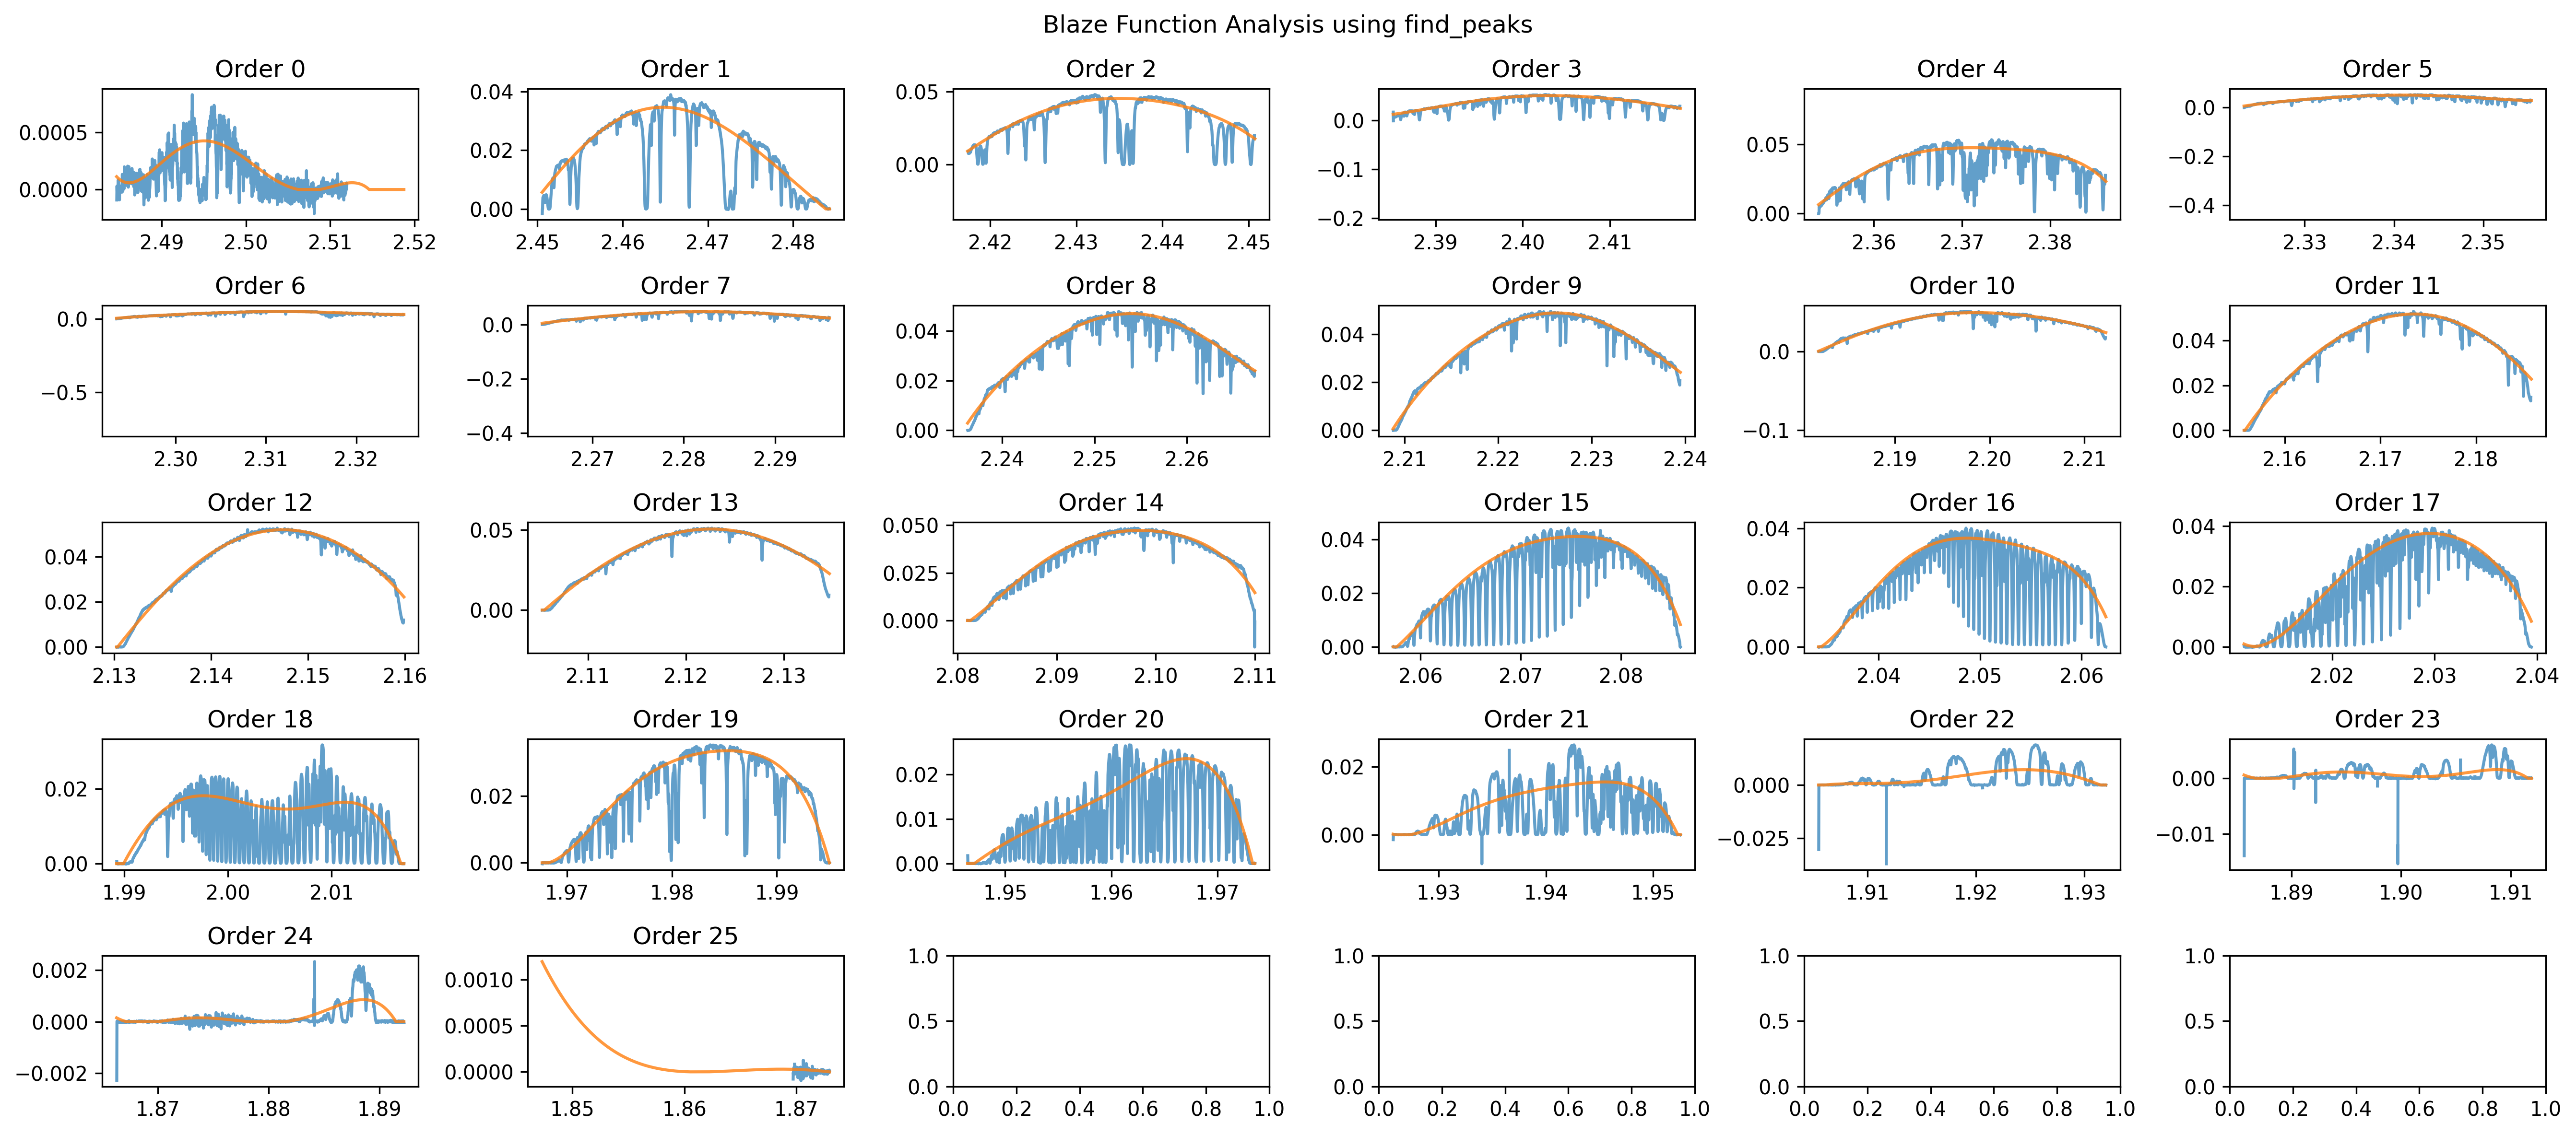

In [28]:
orders = range(26)
# m='low_pass'
# m='convolution'
m='find_peaks'

fig, axes = plt.subplots(5,6, figsize=(18, 8),dpi=300)
fig.tight_layout(pad=2.0)  # Adjust the spacing between subplots

for i, order in enumerate(orders):
    row = i // 6  # Row index in the subplot grid
    col = i % 6  # Column index in the subplot grid

    ax = axes[row, col]  # Get the corresponding subplot axes

    w, b = find_func(blaze, wave, order, method=m,peak_prominence=0.08)

    ax.plot(w,blaze[order], alpha=0.7)
    ax.plot(w, b, alpha=0.8)
    ax.set_title('Order {}'.format(order))

plt.suptitle('Blaze Function Analysis using {}'.format(m))

plt.tight_layout();
plt.show();

#### Create blaze function list for H band

In [11]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA'

# extract the spec.A0V data
p=path/Path('SDCH_20201213_0023.spec_a0v.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    wave = hdu[1].data
    tgt = hdu[2].data
    a0v = hdu[3].data
    vega = hdu[4].data

blaze = a0v/vega
np.shape(spec)[0]

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCH_20201213_0023.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     305   (2048, 28)   float64   
  1  WAVELENGTH    1 ImageHDU       304   (2048, 28)   float64   
  2  TGT_SPEC      1 ImageHDU       304   (2048, 28)   float32   
  3  A0V_SPEC      1 ImageHDU       304   (2048, 28)   float32   
  4  VEGA_SPEC     1 ImageHDU       304   (2048, 28)   float64   
  5  SPEC_DIVIDE_CONT    1 ImageHDU       304   (2048, 28)   float64   


28

In [12]:
blaze_func_arr = np.empty((0, np.shape(spec)[1]));
orders = range(np.shape(spec)[0]);

for order in orders:
    _, b = find_func(blaze, wave, order, crop=-100);
    blaze_func_arr = np.vstack((blaze_func_arr, b));

h_blaze_func_arr = blaze_func_arr
print(np.shape(h_blaze_func_arr))

Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........


/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);
/tmp/ipykernel_157543/1159045424.py:5: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=-100);

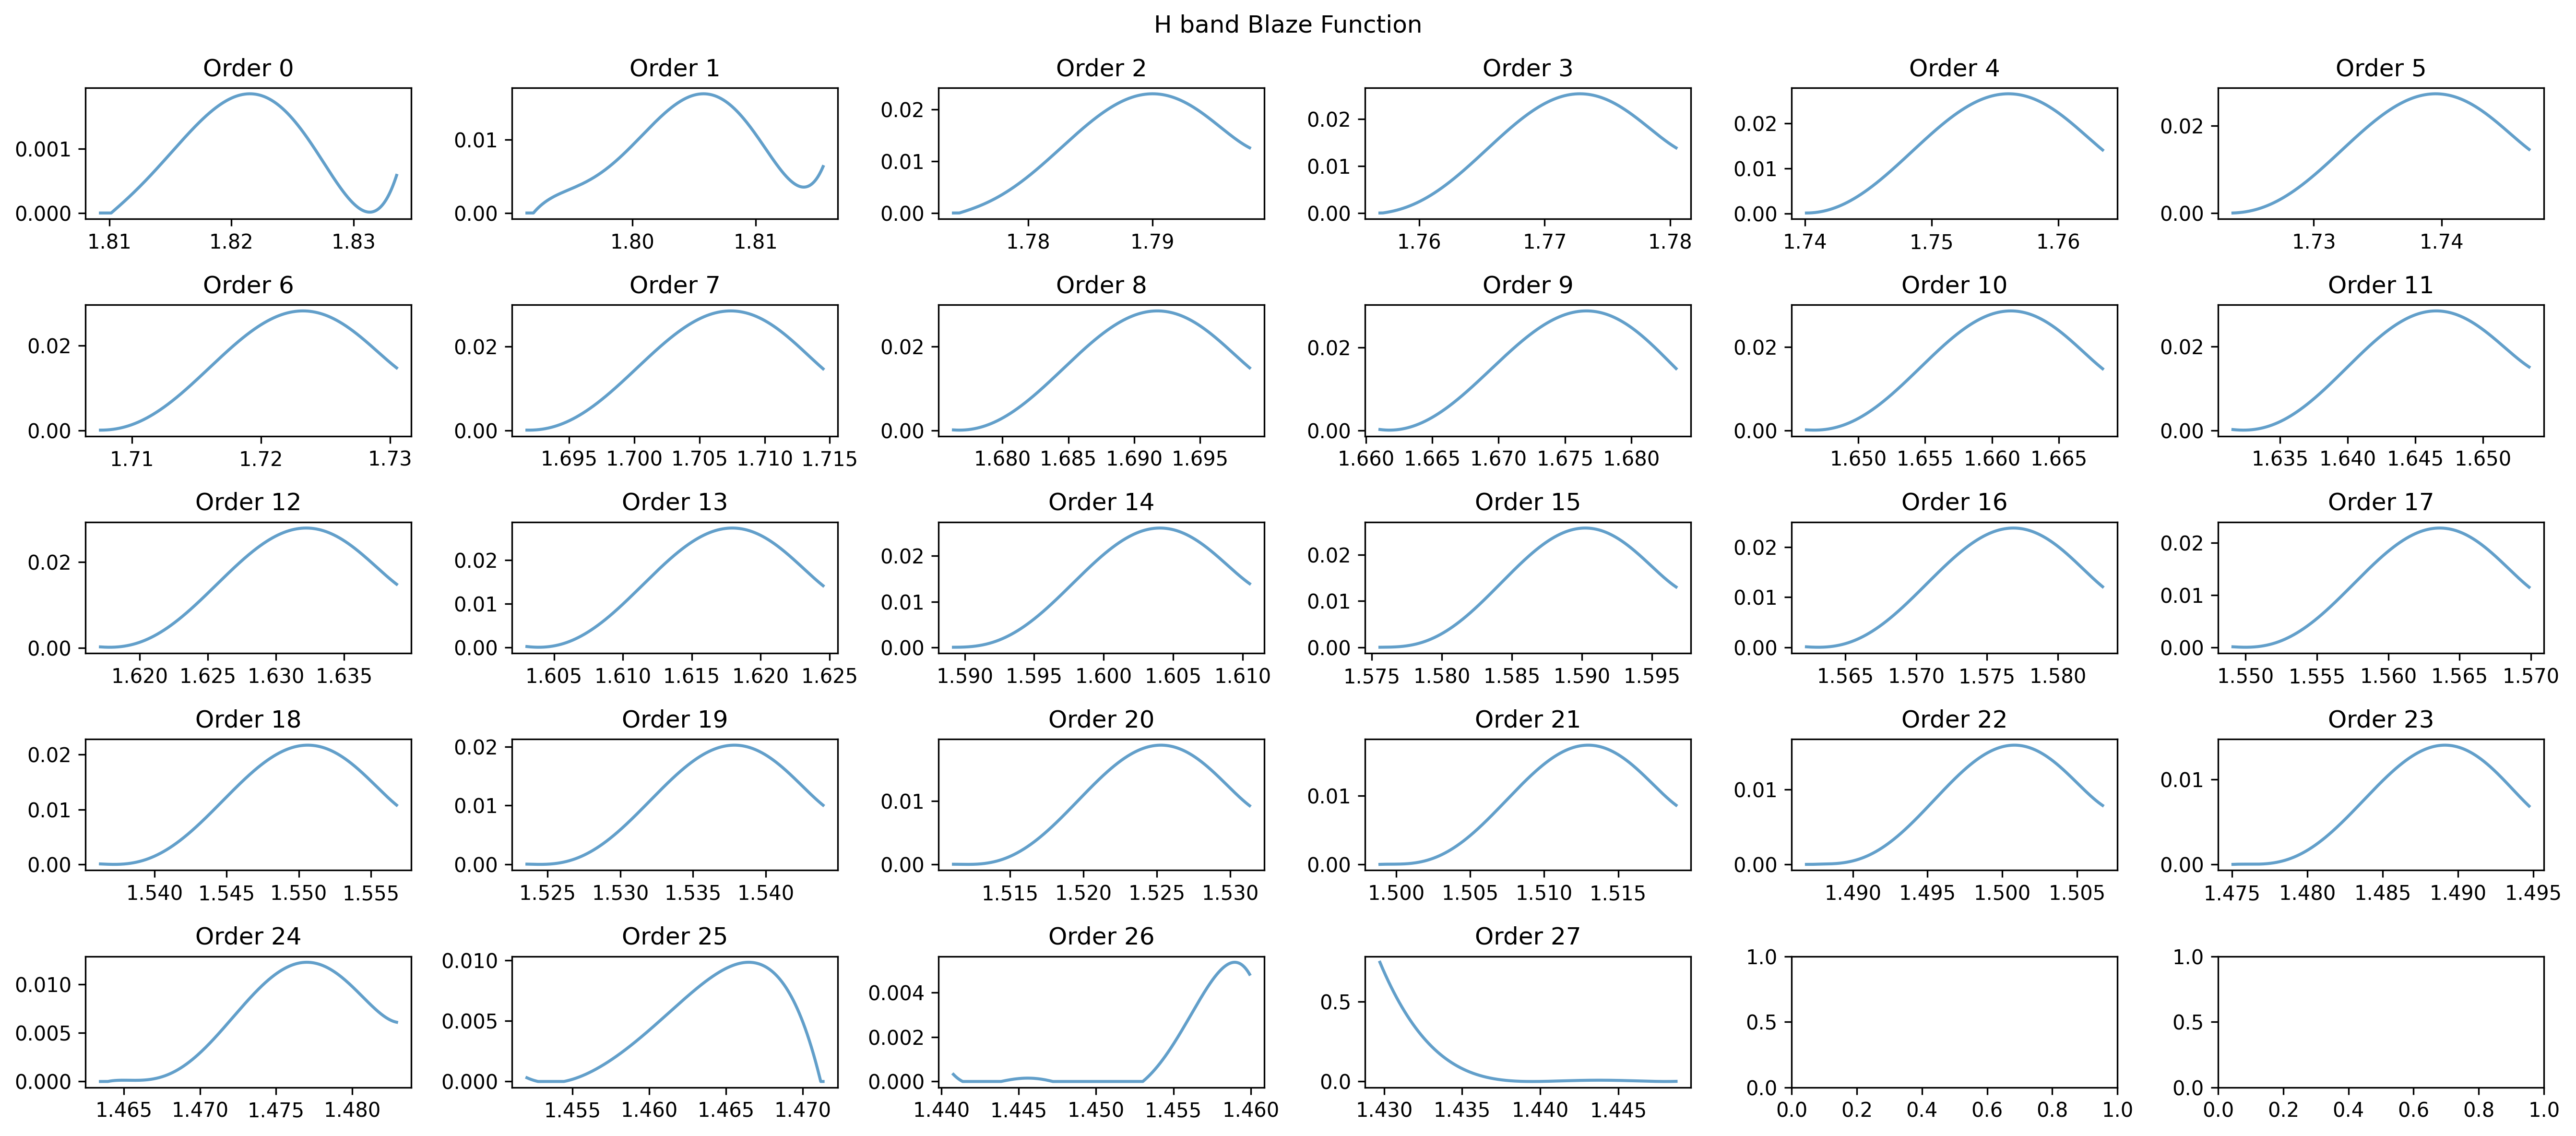

In [13]:
fig, ax = plt.subplots(5, 6, figsize=(18, 8), dpi=300)
fig.tight_layout(pad=2.0)

for i, order in enumerate(orders):
    ax_row = i // 6  # Calculate the row index of the current subplot
    ax_col = i % 6   # Calculate the column index of the current subplot
    
    ax[ax_row, ax_col].plot(wave[order], h_blaze_func_arr[order], alpha=0.7)
    ax[ax_row, ax_col].set_title('Order {}'.format(order))

plt.suptitle('H band Blaze Function')

plt.tight_layout()
plt.show()

#### Create blaze function list for K band

In [14]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA'

# extract the spec.A0V data
p=path/Path('SDCK_20201213_0023.spec_a0v.fits')
with fits.open(p) as hdu:
    hdu.info()
    h = hdu[0].header
    spec = hdu[0].data
    wave = hdu[1].data
    tgt = hdu[2].data
    a0v = hdu[3].data
    vega = hdu[4].data

blaze = a0v/vega
np.shape(spec)[0]

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCK_20201213_0023.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     299   (2048, 26)   float64   
  1  WAVELENGTH    1 ImageHDU       298   (2048, 26)   float64   
  2  TGT_SPEC      1 ImageHDU       298   (2048, 26)   float32   
  3  A0V_SPEC      1 ImageHDU       298   (2048, 26)   float32   
  4  VEGA_SPEC     1 ImageHDU       298   (2048, 26)   float64   
  5  SPEC_DIVIDE_CONT    1 ImageHDU       298   (2048, 26)   float64   


26

In [15]:
crop_len=-100
blaze_func_arr = np.empty((0, np.shape(spec)[1]));
orders = range(np.shape(spec)[0]);
special1 = [3,5,6,7,8,10,11,12,13,14,16]
special2 = [18,20]

for order in orders:
    if order in special1:
        _,b = find_func(blaze, wave, order, crop=crop_len,fit_order=6,peak_prominence=0.001)
        blaze_func_arr = np.vstack((blaze_func_arr, b))

    elif order in special2:
        _,b = find_func(blaze, wave, order, crop=crop_len,fit_order=6,conv_box=400,peak_prominence=0.05)
        blaze_func_arr = np.vstack((blaze_func_arr, b))

    else:
        _, b = find_func(blaze, wave, order, crop=crop_len);
        blaze_func_arr = np.vstack((blaze_func_arr, b))

k_blaze_func_arr = blaze_func_arr

print(np.shape(k_blaze_func_arr))


Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........
FIND PEAK METHOD applied
Finding........


/tmp/ipykernel_157543/382494746.py:17: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=crop_len);
/tmp/ipykernel_157543/382494746.py:17: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=crop_len);
/tmp/ipykernel_157543/382494746.py:17: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=crop_len);
/tmp/ipykernel_157543/382494746.py:9: RankWarning: Polyfit may be poorly conditioned
  _,b = find_blaze_func(blaze, wave, order, crop=crop_len,fit_order=6,peak_prominence=0.001)
/tmp/ipykernel_157543/382494746.py:17: RankWarning: Polyfit may be poorly conditioned
  _, b = find_blaze_func(blaze, wave, order, crop=crop_len);
/tmp/ipykernel_157543/382494746.py:9: RankWarning: Polyfit may be poorly conditioned
  _,b = find_blaze_func(blaze, wave, order, crop=crop_len,fit_order=6,peak_prominence=0.001)
/tmp/ipykernel_157543/382494746.py:9: RankWarning: Polyf

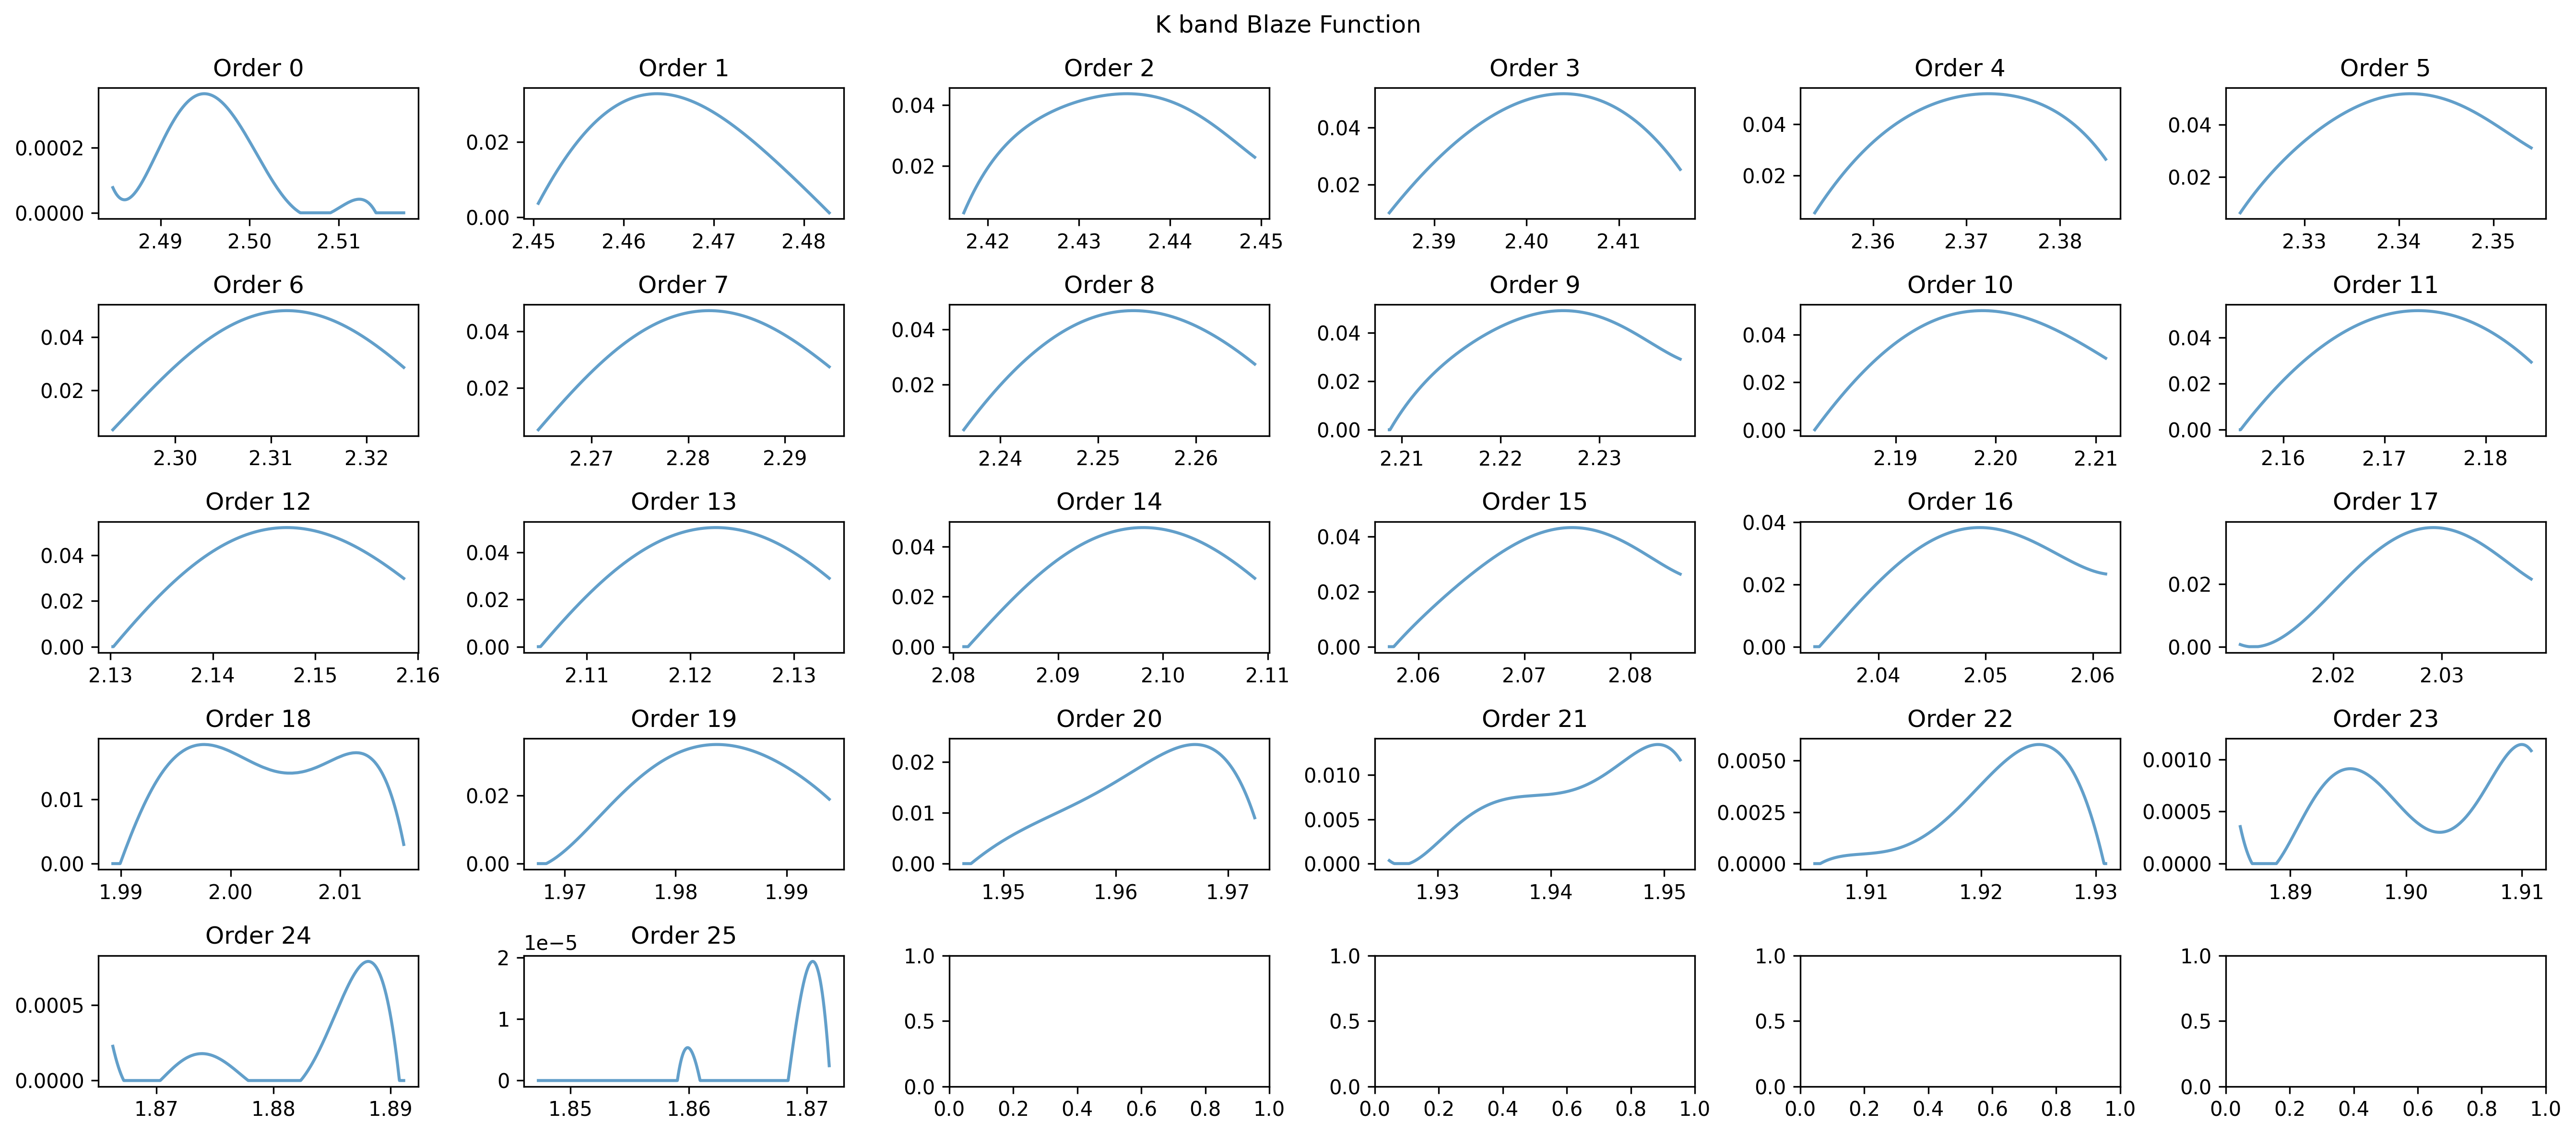

In [16]:
fig, ax = plt.subplots(5, 6, figsize=(18, 8), dpi=300)
fig.tight_layout(pad=2.0)

for i, order in enumerate(orders):
    ax_row = i // 6  # Calculate the row index of the current subplot
    ax_col = i % 6   # Calculate the column index of the current subplot
    
    ax[ax_row, ax_col].plot(wave[order], k_blaze_func_arr[order], alpha=0.7)
    ax[ax_row, ax_col].set_title('Order {}'.format(order))

plt.suptitle('K band Blaze Function')

plt.tight_layout()
plt.show()

In [17]:
# Create separate fits files that contains H band and K band blaze function.

h_primary_hdu = fits.PrimaryHDU(h_blaze_func_arr)
h_hdulist = fits.HDUList([h_primary_hdu])
h_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits'), overwrite=True)

k_primary_hdu = fits.PrimaryHDU(k_blaze_func_arr)
k_hdulist = fits.HDUList([k_primary_hdu])
k_hdulist.writeto(Path('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/K_blaze_function.fits'), overwrite=True)


In [27]:
# Check the created fits file
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab'

# extract the spec.A0V data
p=path/Path('H_blaze_function.fits')
with fits.open(p) as hdu:
    hdu.info()
    d=hdu[0].data

print(d[0])
np.sum(np.isnan(d[0]))

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 28)   float64   
[ 0.  0.  0. ... nan nan nan]


100

## Try Starships implementation

#### Make a list of spec and function to read

In [19]:
# In terminal, 
# ls /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCH_20201213_*.spec.fits > /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/list_SDCH_spec.txt
# ls /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/PLP_REDUCED_DATA/SDCK_20201213_*.spec.fits > /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/list_SDCK_spec.txt

#### Read list of fits files in a txt file

In [ ]:
def read_all_sp_igrins(path, file_list, blaze_path=None):    
    
    """
    Read all spectra
    Must have a list with all filename to read 
    """

    # create some empty list and append later
    headers, count, wv, blaze = list_of_dict([]), [], [], []
    # headers, count, wv, blaze = [], [], [], []
    filenames = []

    blaze_path = Path(blaze_path)
    file_list = path/Path(file_list)

    # ----------------- Zoe's Code start here ---------------------------
    with open(file_list, 'r') as file:
        file_paths = file.readlines()
    file_paths = [path.strip() for path in file_paths]

    # Iterate over the file paths and open each FITS file
    for file in file_paths:
        try:
            filenames.append(file)

            hdul = fits.open(file)

            header = hdul[0].header
            image = hdul[0].data
            wvsol = hdul[1].data

            headers.append(header)
            count.append(image)
            wv.append(wvsol)
            
            hdul.close()  # Close the FITS file after processing
            
        except IOError:
            print(f"Error opening FITS file: {file}")
    
    with fits.open(blaze_path) as hdul:
        b = hdul[0].data
        blaze.append(b)


    # LISTs need to return: 
    # filename: check
    # header: check
    # wavelength: check
    # counts: check
    # blaze function: check
    
    return headers, np.array(wv), np.array(count), np.array(blaze), filenames

In [7]:
# !!!! NEED TO IMPORT CLASS/FUNCTIONS FROM STARSHIPS (list_of_dict class)
import os
from pathlib import Path
from sys import path
path.append('/home/ldang05/Starships_prj/')

from starships.list_of_dict import list_of_dict
# def read_all_sp_igrins(path, file_list, onedim=False, wv_default=None, blaze_default=None,
#                 blaze_path=None, debug=False, ver06=False, cheby=False):

def read_all_sp_igrins(path, file_list, blaze_path=None, input_type='data'):    
    
    """
    Read all spectra
    Must have a list with all filename to read

    input_type: 'data'-observation data, 'recon'-telluric reconstruction 
    """

    # create some empty list and append later

    if input_type == 'data':
        headers, count, wv, blaze = list_of_dict([]), [], [], []
        # headers, count, wv, blaze = [], [], [], []
        filenames = []
        tellu_recon = []

        blaze_path = Path(blaze_path)
        file_list = path/Path(file_list)

        with open(file_list, 'r') as file:
            file_paths = file.readlines()
        file_paths = [path.strip() for path in file_paths]

        # Iterate over the file paths and open each FITS file
        for file in file_paths:
            try:
                filenames.append(file)

                hdul = fits.open(file)

                header = hdul[0].header
                image = hdul[0].data
                wvsol = hdul[1].data

                headers.append(header)
                count.append(image)
                wv.append(wvsol)
                
                hdul.close()  # Close the FITS file after processing
                
            except IOError:
                print(f"Error opening FITS file: {file}")
        
        with fits.open(blaze_path) as hdul:
            b = hdul[0].data
            blaze.append(b)
        
        return headers, np.array(wv), np.array(count), np.array(blaze), filenames
    
    elif input_type == 'recon': # file_list is telluric_recon
        
        for file in file_paths:
            try:
                hdul = fits.open(file)

                tellu = hdul[0].data
                tellu_recon.append(tellu)
                
                hdul.close() 
                
            except IOError:
                print(f"Error opening FITS file: {file}")
            
        return np.array(tellu_recon)


In [3]:
file_list = '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/list_SDCH_spec.txt'
blaze_path = '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_blaze_function.fits'
h,f,wv,count,blaze = read_all_sp_igrins(file_list, blaze_path)

In [16]:
h

[SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                  -32 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                 2048                                                  
 NAXIS2  =                   28                                                  
 EXTEND  =                    T                                                  
 I_HDRVER= '0.992   '           / version of IGRINS FITS Header                  
 OBSERVAT= 'Gemini Observatory' / Name of the observatory                        
 TELESCOP= 'Gemini South'       / Name of the telescope                          
 INSTRUME= 'IGRINS  '           / Name of the instrument                         
 DETECTOR= 'H2RG    '           / name of Detector                               
 TIMESYS = 'UTC     '           / Time system used in this header                
 OBSERVER= 'IGRI

In [17]:
np.shape(wv)

(80, 28, 2048)

#### Combine H and K telluric-corrected blaze function

In [2]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/'

In [14]:
# Open the first FITS file
fits_file1 = fits.open(path/Path('H_telluric_corr.fits'))
data1 = fits_file1[0].data
print(np.shape(data1))

# Open the second FITS file
fits_file2 = fits.open(path/Path('K_telluric_corr.fits'))
data2 = fits_file2[0].data
print(np.shape(data2))

# Combine the data from both files
combined_data = np.vstack((data1, data2))
print(np.shape(combined_data))

# Create a new FITS file and save the combined data
combined_hdu = fits.PrimaryHDU(combined_data)
combined_hdulist = fits.HDUList([combined_hdu])
combined_hdulist.writeto(path/Path('HK_tellu_corrected_blaze_func.fits'), overwrite=True)

# Close the opened FITS files
fits_file1.close()
fits_file2.close()

(28, 2048)
(26, 2048)
(54, 2048)


In [15]:
# check saved fits file
p = path/Path('HK_tellu_corrected_blaze_func.fits')

with fits.open(p) as hdu:
    hdu.info()
    d = hdu[0].data
    print(np.shape(d))

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/HK_tellu_corrected_blaze_func.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 54)   float64   
(54, 2048)


#### Combine H and K band spectrum for each exposure into one fits file and append to the txt file

In [14]:
path='/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/'

In [ ]:
# # clear txt file in the terminal first
# echo -n > list_SDCHK_spec.txt

In [32]:
# Read the first text file containing file paths
with open(path/Path('list_SDCH_spec.txt'), 'r') as file1:
    file_paths1 = file1.read().splitlines()

# Read the second text file containing file paths
with open(path/Path('list_SDCK_spec.txt'), 'r') as file2:
    file_paths2 = file2.read().splitlines()

# Iterate over the file paths and stack the FITS data
for path1, path2 in zip(file_paths1, file_paths2):
    # Open the first FITS file and extract data
    exp_time = path1[-14:]
    filename = f'/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/COMBINED_HK_SPEC/{exp_time}'

    with fits.open(path1) as fits_file1:
        # fits_file1.info()
        data1 = fits_file1[0].data
        wv1 = fits_file1[1].data
        header1 = fits_file1[0].header  # Get the header of path1

    # Open the second FITS file and extract data
    with fits.open(path2) as fits_file2:
        data2 = fits_file2[0].data
        wv2 = fits_file2[1].data

    # Stack the data from both files
    combined_data = np.vstack((data1, data2))
    combined_wv = np.vstack((wv1, wv2))

    # Save the combined data as a new FITS file
    primary_hdu = fits.PrimaryHDU(combined_data, header=header1)
    wv_hdu = fits.ImageHDU(combined_wv)

    hdul = fits.HDUList([primary_hdu, wv_hdu])
    hdul.writeto(filename, overwrite=True)

    # Append the new FITS file path to another text file
    with open(path/Path('list_SDCHK_spec.txt'), 'a') as combined_files:
        combined_files.write(filename + '\n')


In [35]:
# Check one combined fits file

with fits.open('/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/COMBINED_HK_SPEC/0021.spec.fits') as fits_file:
    # Access the header or data as needed
    fits_file.info()
    header = fits_file[0].header
    data = fits_file[0].data
    wv = fits_file[1].data

    # Perform any desired checks or analysis on the FITS file
    print("FITS file information:")
    print(header)
    print("Data shape:", data.shape)

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/COMBINED_HK_SPEC/0021.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     302   (2048, 54)   float32   
  1                1 ImageHDU         7   (2048, 54)   float64   
FITS file information:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2048                                                  NAXIS2  =                   54                                                  EXTEND  =                    T                                                  I_HDRVER= '0.992   '           / version of IGRINS FITS Header                  OBSERVAT= 'Gemini Observatory' / Name of the observatory                        TELESCOP= 'Gemini South'       / Name of the

#### Combine H and K band telluric reconstructed spec for each exposure into one fits file and append to the txt file

In [27]:
# Read the first text file containing file paths
with open(path/Path('H_list_tellu_recon.txt'), 'r') as file1:
    file_paths1 = file1.read().splitlines()

# Read the second text file containing file paths
with open(path/Path('K_list_tellu_recon.txt'), 'r') as file2:
    file_paths2 = file2.read().splitlines()


filename = '/home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/COMBINED_HK_tellu_recon/HK_tellu_recon.fits'

with fits.open(file_paths1[0]) as fits_file1:
    fits_file1.info()
    data1 = fits_file1[0].data

# Open the second FITS file and extract data
with fits.open(file_paths2[0]) as fits_file2:
    data2 = fits_file2[0].data

combined_data = np.vstack((data1, data2))

primary_hdu = fits.PrimaryHDU(combined_data)
hdul = fits.HDUList(primary_hdu)
hdul.writeto(filename, overwrite=True)

# Append the new FITS file path to another text file
with open(path/Path('HK_list_tellu_recon.txt'), 'a') as combined_files:
    combined_files.write(filename + '\n')

'''
# In terminal, copy the reconstructed telluric 79 times
head -n 1 HK_list_tellu_recon.txt | tee -a HK_list_tellu_recon.txt
for i in {1..78}; do printf "\n"; cat HK_list_tellu_recon.txt | head -n 1 >> HK_list_tellu_recon.txt; done
'''

Filename: /home/ldang05/projects/def-dlafre/ldang05/Data/WASP-77Ab/H_tellu_recon.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 28)   float64   
